In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('bank-additional.csv', delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()


PermissionError: [Errno 1] Operation not permitted: 'bank-additional.csv'

In [ ]:
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

print("Categorical Columns:\n", cat_cols)
print("\nNumerical Columns:\n", num_cols)


Categorical Columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')

Numerical Columns:
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
df.describe()
df.describe(include='object')


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


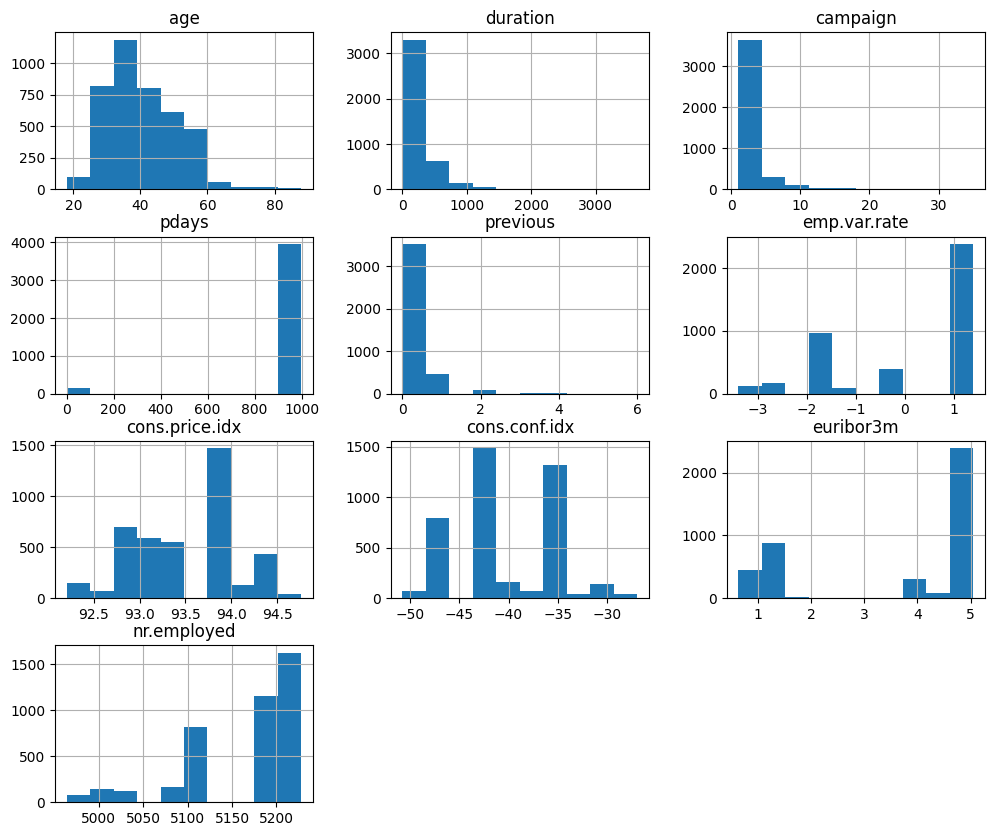

In [ ]:
df[num_cols].hist(figsize=(12,10))
plt.show()


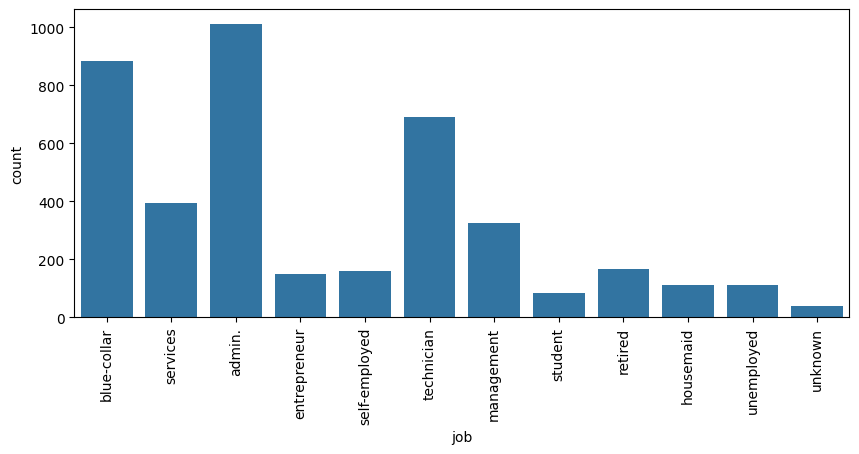

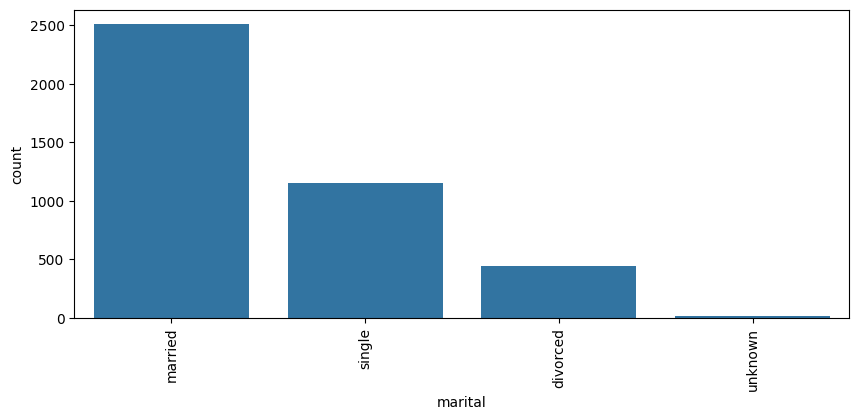

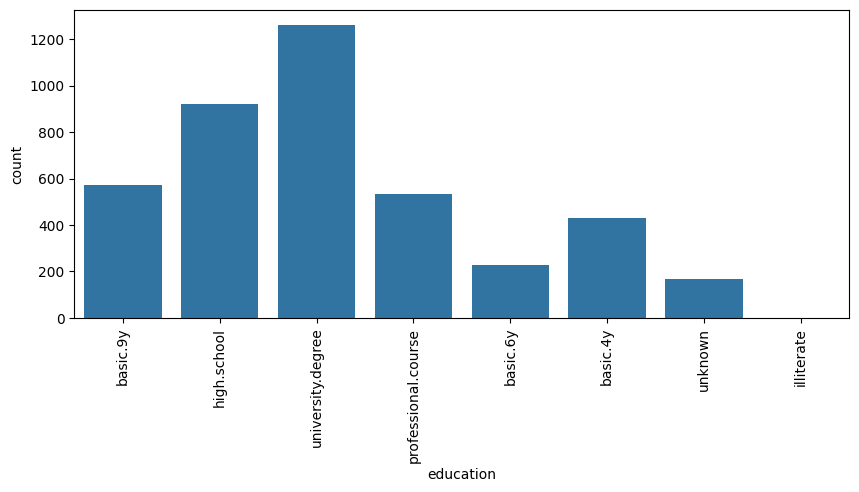

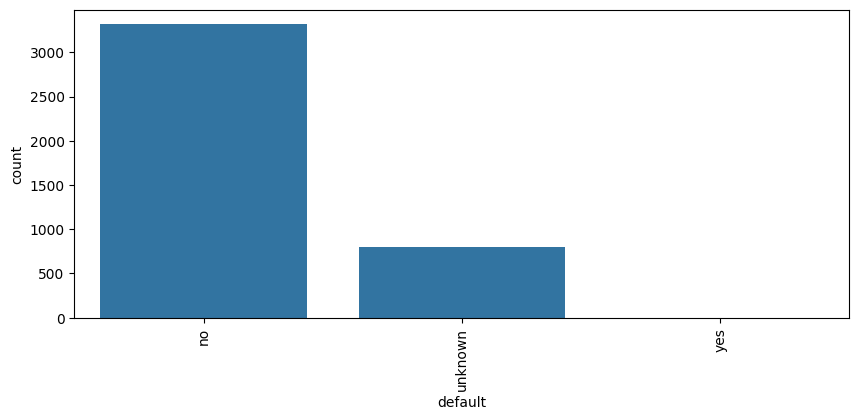

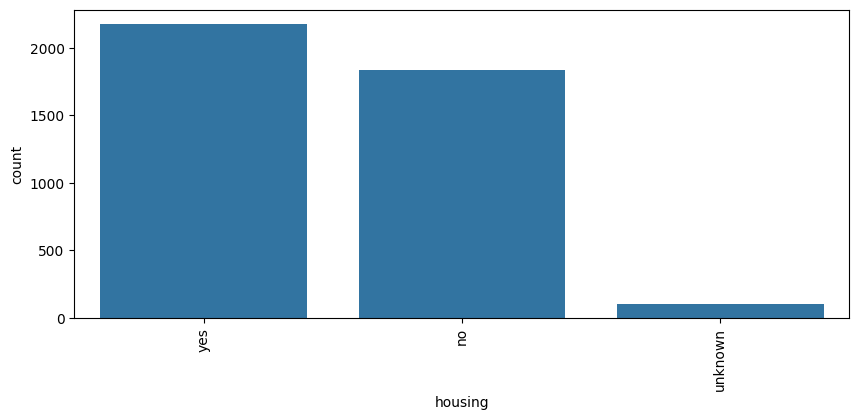

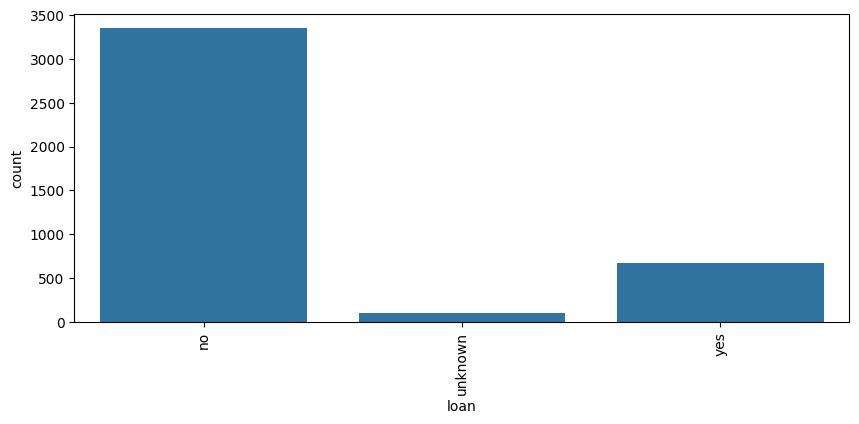

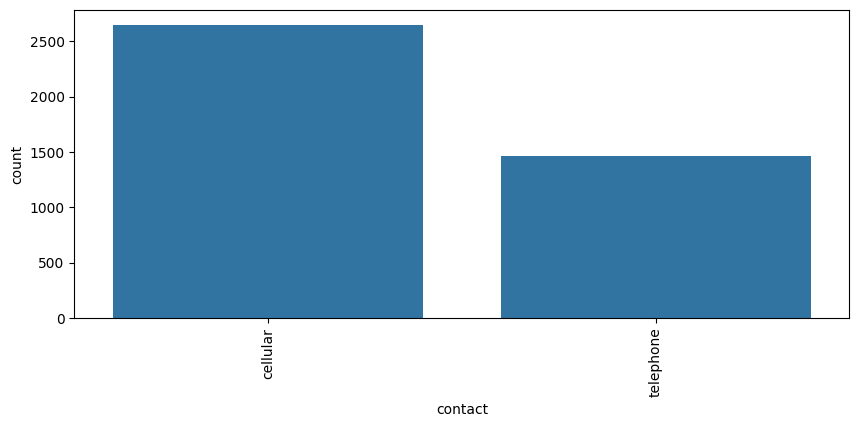

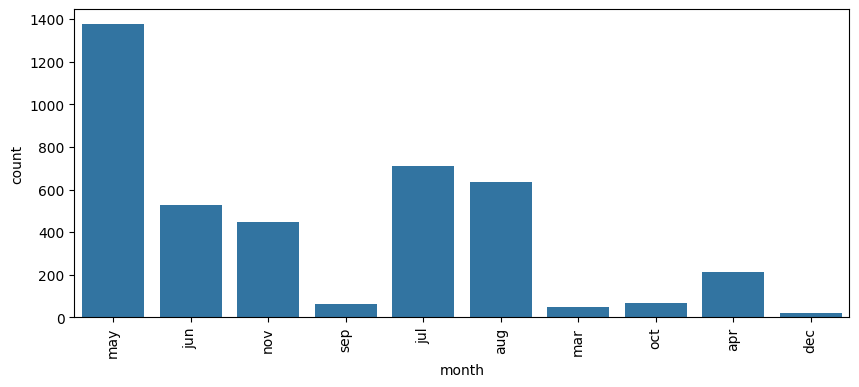

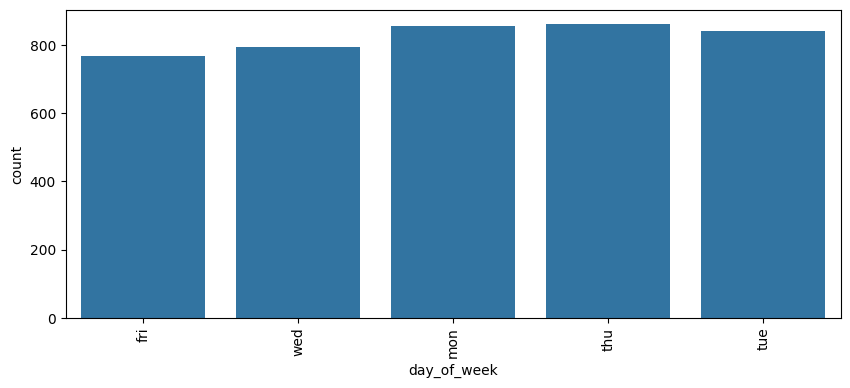

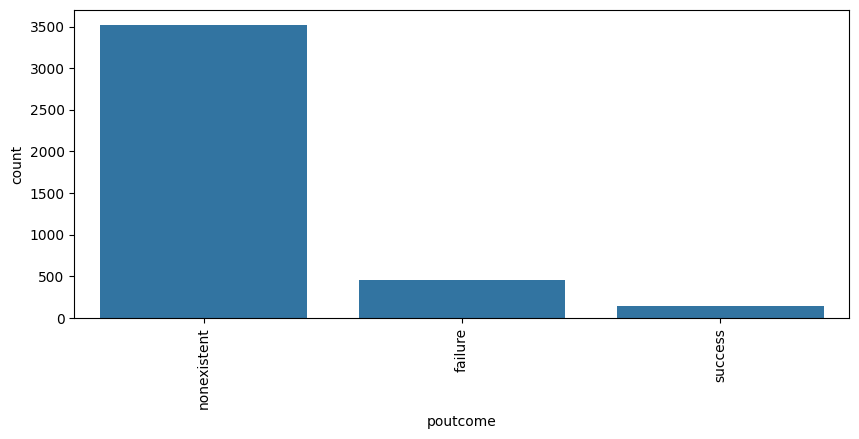

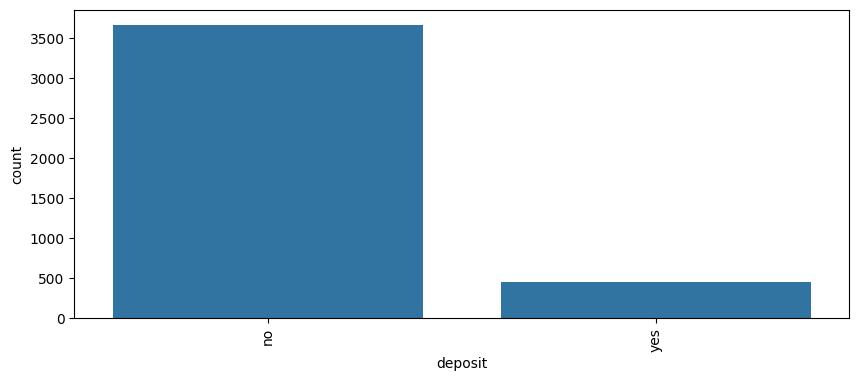

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.show()


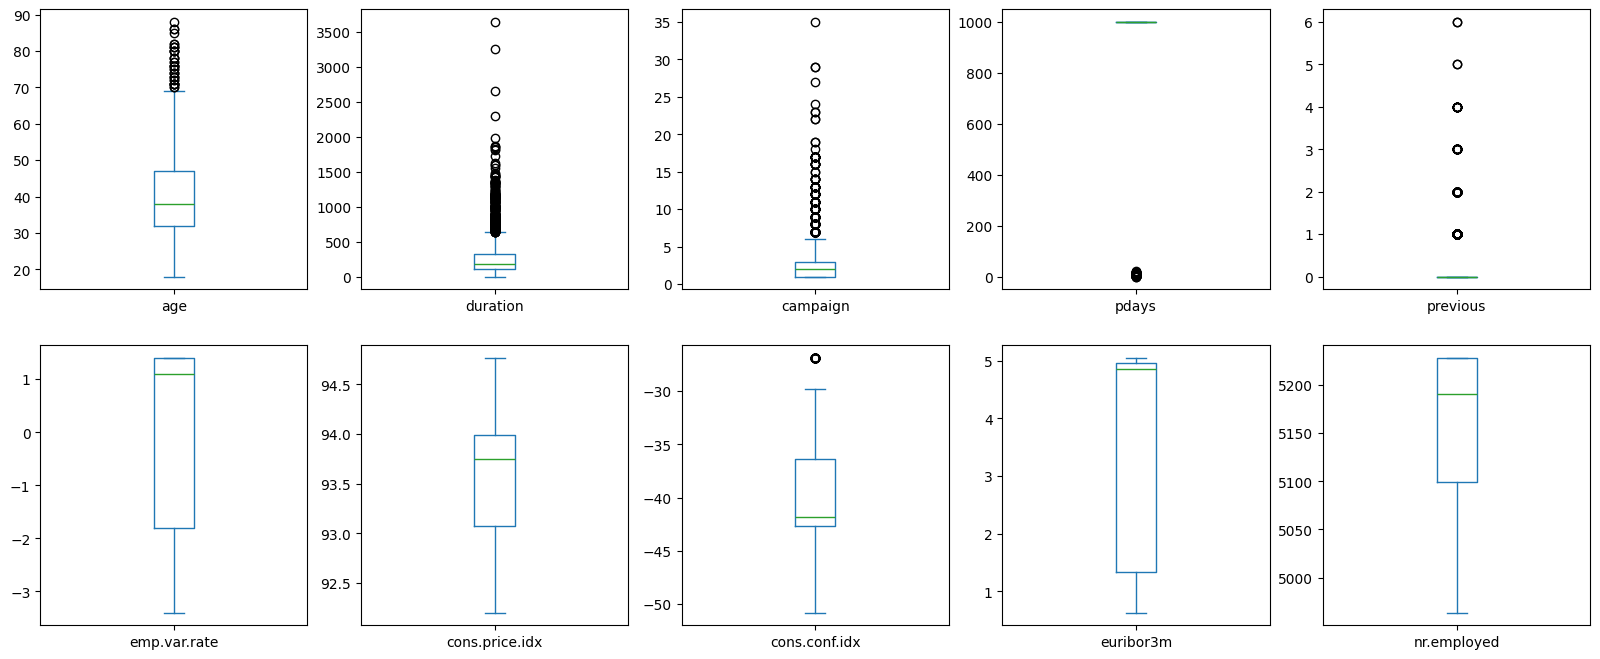

In [ ]:
df[num_cols].plot(kind='box', subplots=True, layout=(2,5), figsize=(20,8))
plt.show()


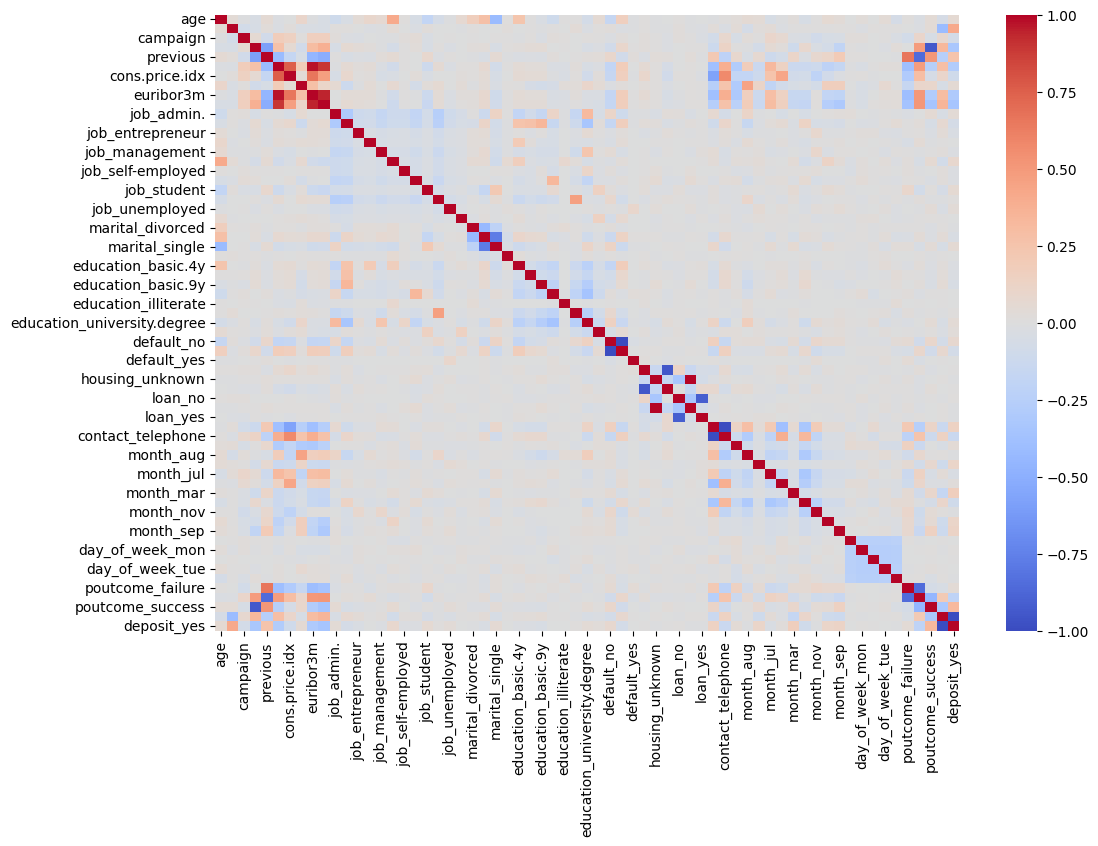

In [ ]:
df_dummies = pd.get_dummies(df)
corr = df_dummies.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm')
plt.show()


In [ ]:
df = df.drop(['cons.price.idx', 'cons.conf.idx'], axis=1)


In [ ]:
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,3,156,6,0
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,8,207,8,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,9,225,10,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,9,222,10,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,7,201,9,0


In [ ]:
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


In [ ]:
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced'
)

dt.fit(x_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_leaf=10, min_samples_split=20)

In [ ]:
y_pred = dt.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8341423948220065

Confusion Matrix:
 [[921 184]
 [ 21 110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      1105
           1       0.37      0.84      0.52       131

    accuracy                           0.83      1236
   macro avg       0.68      0.84      0.71      1236
weighted avg       0.91      0.83      0.86      1236



In [ ]:
print("Training Accuracy:", dt.score(x_train, y_train))
print("Testing Accuracy:", dt.score(x_test, y_test))


Training Accuracy: 0.8727020464793618
Testing Accuracy: 0.8341423948220065


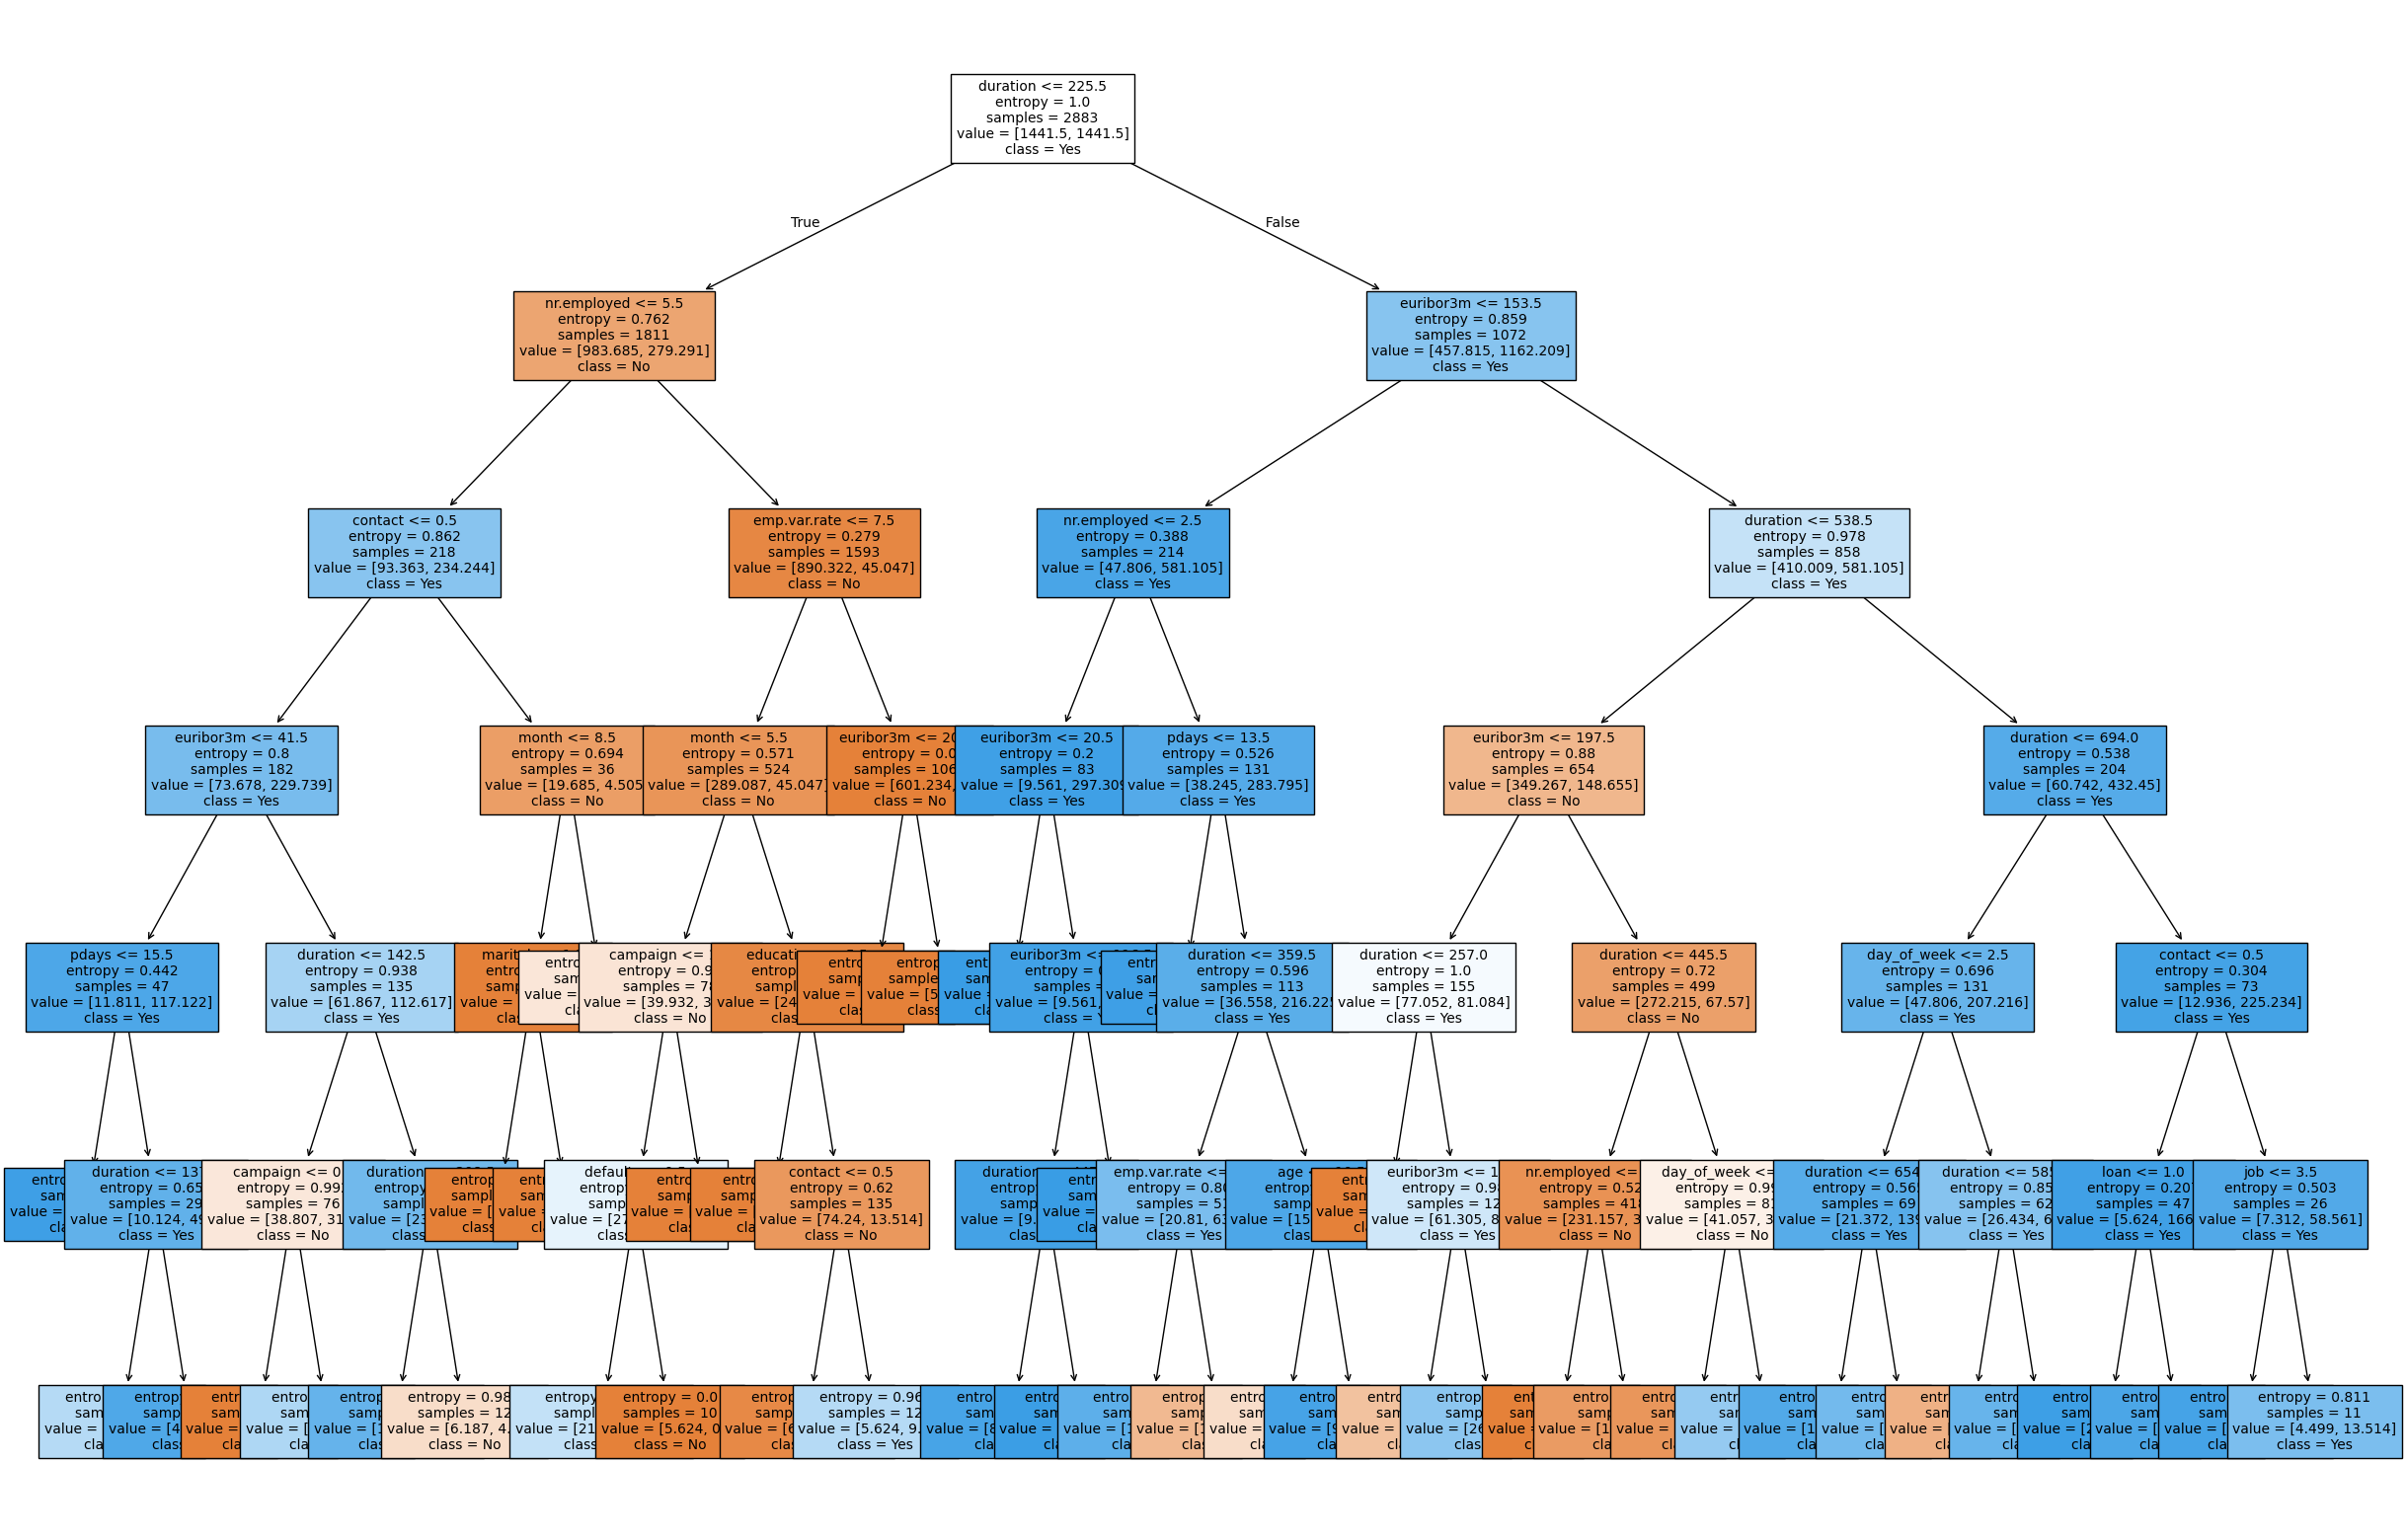

In [ ]:
plt.figure(figsize=(30,20))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['No','Yes'],
    filled=True,
    fontsize=10
)
plt.show()
